In [310]:
# Split the txt file at ','
# Good example, T4 with cleanup 13
# T7 - missing edge
with open('MAX_20170123_I01_003-Scene-4-P4-split_T16.ome.txt','r') as f:
    a = [l.split(',') for l in f]

In [311]:
# Get x and y co-ordinates
import numpy as np
x,y, X, Y = [],[], [],[]

for num in a:
    if len(num) == 2:
        x.append(int(num[0]))
        y.append(int(num[1].strip('\n')))
    if len(num) == 1:
        X.append(x)
        Y.append(y)
        x = []
        y = []
X.append(x)
Y.append(y)
X.pop(0)
Y.pop(0)

[]

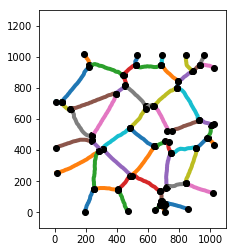

In [312]:
# plot stuff
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.set(xlim =[-100,1100], ylim = [-100,1300], aspect = 1)

for i in range(len(X)):
    ax.plot(X[i], Y[i], lw = 4)
    ax.plot(X[i][0], Y[i][0], 'ok')
    ax.plot(X[i][-1], Y[i][-1], 'ok')

plt.show()

Number of edges: 64


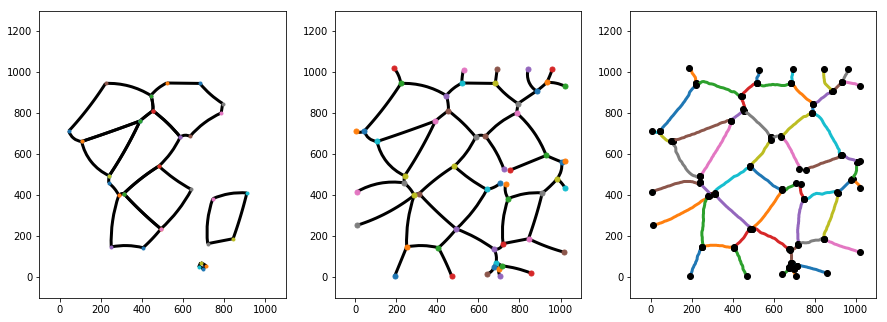

In [313]:
import sys
sys.path.insert(0, '../cell_soap/')
from cell_describe import node, edge, cell, colony, data, manual_tracing

ex = manual_tracing(X, Y)
print('Number of edges:',len(X))

nodes, edges, new = ex.cleanup(17)

cells = ex.find_cycles(edges)

# Plot fitted edges

fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize = (15,8))
ax1.set(xlim = [-100,1100], ylim = [-100,1300], aspect = 1)
#ax1.set(xlim = [400,800], ylim = [0,800], aspect = 1)
ax.set(xlim = [-100,1100], ylim = [-100,1300], aspect = 1)
ax2.set(xlim =[-100,1100], ylim = [-100,1300], aspect = 1)
[c.plot(ax, lw = 3) for c in cells]

[n.plot(ax1, markersize = 10) for n in nodes]
[n.plot(ax1, markersize = 20) for n in nodes if len(n.edges) == 2]
[e.plot(ax1, lw = 3) for e in edges]

# [n.plot(ax2, markersize = 10) for n in nodes]
# [n.plot(ax2, markersize = 20) for n in nodes if len(n.edges) == 2]
# [e.plot(ax2, lw = 3) for e in edges]

for i in range(len(X)):
    ax2.plot(X[i], Y[i], lw = 3)
    ax2.plot(X[i][0], Y[i][0], 'ok')
    ax2.plot(X[i][-1], Y[i][-1], 'ok')


plt.show()

In [303]:
# Calculate tension and pressure
import numpy.linalg as la
# Get unique cells
cells = ex.find_cycles(edges)

# Get tension and pressure
edges2 = [e for e in edges if e.radius is not None]
col1 = colony(cells, edges2, nodes)
tensions, P_T, A = col1.calculate_tension()

pressures, P_P, B = col1.calculate_pressure()

print('Number of edges:',len(col1.tot_edges))
print('Number of nodes:',len(col1.tot_nodes))
print('\n')
print('Condition number of tension matrix A:',la.cond(A))
print('Condition number of pressure matrix B:',la.cond(B))
print('Mean value of tension:',np.mean(tensions))
if pressures is not None:
    print('Mean value of pressure:',np.mean(pressures))

     fun: 1.040327383607222
     jac: array([0.03582808, 0.03608528, 0.03578448, 0.03517671, 0.03592411,
       0.03564021, 0.03566909, 0.03572722, 0.03639089, 0.03589866,
       0.03597765, 0.03634605, 0.035895  , 0.03531255, 0.03574502,
       0.03619057, 0.0356662 , 0.03550853, 0.03574754, 0.03615835,
       0.03587782, 0.03575473, 0.03567058, 0.03613858, 0.03608157,
       0.03584722, 0.03607474, 0.03571981, 0.03601728, 0.03579146,
       0.03581458, 0.03575054, 0.03599223, 0.03584279, 0.03556286,
       0.03549856, 0.03607027, 0.03591622, 0.03595005, 0.03571093,
       0.03606533, 0.03629604, 0.03585231, 0.03599842, 0.03604044,
       0.03601043, 0.0360525 , 0.03601438, 0.03614499, 0.03599922,
       0.03596193, 0.03623885, 0.03574385, 0.03564912, 0.03577891,
       0.0359173 , 0.03559195, 0.03541896])
 message: 'Optimization terminated successfully.'
    nfev: 1646
     nit: 27
    njev: 27
  status: 0
 success: True
       x: array([0.42962994, 0.23491474, 0.76373746, 0.50826334

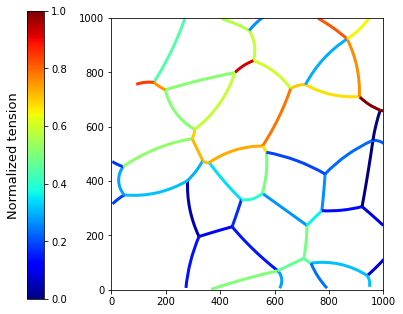

In [304]:
# Plot 
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,5))
col1.plot_tensions(ax, fig, tensions)

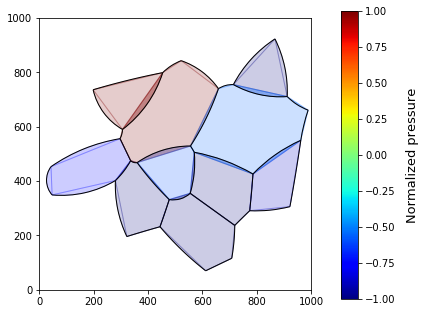

In [305]:
# Plot 
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,5))

#col1.plot(ax, fig, tensions, pressures )
col1.plot_pressures(ax, fig, pressures )
[e.plot(ax) for e in col1.edges]
plt.show()